In [21]:
import pyxdf
import numpy as np
import matplotlib.pyplot as plt
from mne.preprocessing import ICA
import mne
import bisect
import os
import re
from scipy.stats import ttest_ind, ttest_rel

In [22]:
def get_data(participant_file, pr, percentage=False):
    data, header = pyxdf.load_xdf(participant_file)
    eeg_stream, marker_stream = None, None
    #find marker stream
    for i, stream in enumerate(data):
        if stream['info']['name'][0] == 'LuckyMarkerStream':
            marker_stream = stream
    
    pics = [x[0] for x in marker_stream['time_series'] if '.' in x[0]]
    ratings = [x[0].split(' ')[1] for x in marker_stream['time_series'] if 'rating' in x[0]]
    total_image_count = len(pics)
    #print(len(pics), len(ratings))
    #zip images and ratings
    combined = zip(pics, ratings)
    general, personal = [],[]
    for p, r in combined:
        #split into general (jpg) and personal (png)
        if 'png' in p:
            personal.append(int(r))
        if 'jpg' in p:
            general.append(int(r))
    
    #count instances of each rating in each list
    personal_ratings_counted = [personal.count(r) for r in pr]
    general_ratings_counted = [general.count(r) for r in pr]

    #if percentage is true calculate the number of ratings as the percentage of the group total
    # e.g. 4 out of 40 rated at 5 for personal --> 10%
    if percentage:
        
        total_personal = len(personal)
        total_general = len(general)

        general_percentage = [(x/total_general) *100 for x in general_ratings_counted]
        personal_percentage = [(x/total_personal) *100 for x in personal_ratings_counted]

        return personal_percentage, general_percentage
        
    return personal_ratings_counted, general_ratings_counted

In [23]:
def get_data_pooled(participant_file):
    #returns full list per category without counting
    data, header = pyxdf.load_xdf(participant_file)
    eeg_stream, marker_stream = None, None
    #find marker stream
    for i, stream in enumerate(data):
        if stream['info']['name'][0] == 'LuckyMarkerStream':
            marker_stream = stream
    
    pics = [x[0] for x in marker_stream['time_series'] if '.' in x[0]]
    ratings = [x[0].split(' ')[1] for x in marker_stream['time_series'] if 'rating' in x[0]]
    total_image_count = len(pics)
    #print(len(pics), len(ratings))
    #zip images and ratings
    combined = zip(pics, ratings)
    general, personal = [],[]
    for p, r in combined:
        #split into general (jpg) and personal (png)
        if 'png' in p:
            personal.append(int(r))
        if 'jpg' in p:
            general.append(int(r))
        
    return personal, general

In [24]:
#create and save fig
def create_figure(personal, general, pr, participant, figure_title, save=True):
    
    index = (np.arange(len(pr)))
    fig, ax = plt.subplots(figsize = (10,6))
    bar_width = 0.35
    bar1 = ax.bar(index - bar_width/2, general, bar_width, label='general dataset', color='blue')
    bar2 = ax.bar(index + bar_width/2, personal, bar_width, label='personal dataset', color='orange')
    ax.set_xlabel('Rating values', fontsize=16)
    ax.set_ylabel('% rated per group', fontsize=16)
    ax.set_title(f'Comparison of ratings given in general vs personal datasets {participant}')
    ax.set_xticks(index)
    ax.set_xticklabels(pr)
    ax.legend()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_position(('outward', 100))  # Add padding to the bottom
    ax.spines['right'].set_position(('outward', 100)) 
    if save:
        print(f'saving behavioral ratings for {participant}')
        plt.savefig(f'figures/{figure_title}_{participant}.png', dpi=300, bbox_inches='tight')
    plt.show()

In [25]:
def create_split_figure(personal, general, pr, participant, figure_title, save=True):
    index = np.arange(len(pr))
    bar_width = 0.35

    neg_mask = pr < 0
    pos_mask = pr > 0

    for title_suffix, mask in zip(['negative', 'positive'], [neg_mask, pos_mask]):
        fig, ax = plt.subplots(figsize=(8, 5))
        ix = np.arange(sum(mask))
        bar1 = ax.bar(ix - bar_width/2, np.array(general)[mask], bar_width, label='general', color='blue')
        bar2 = ax.bar(ix + bar_width/2, np.array(personal)[mask], bar_width, label='personal', color='orange')

        ax.set_xlabel('Rating values', fontsize=14)
        ax.set_ylabel('Count', fontsize=14)
        ax.set_title(f'{figure_title} ({title_suffix} ratings) - Participant {participant}')
        ax.set_xticks(ix)
        ax.set_xticklabels(pr[mask])
        ax.legend()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        if save:
            os.makedirs('figures', exist_ok=True)
            filename = f'figures/{figure_title}_{title_suffix}_{participant}.png'
            plt.savefig(filename, dpi=300, bbox_inches='tight')
        plt.show()

In [26]:
file_path = 'eeg/' 
participant_files = [f'{file_path}{x}'  for x in os.listdir(file_path) if not x.startswith('.')]


002


C:\ProgramData\miniconda3\envs\prompts\Lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\ProgramData\miniconda3\envs\prompts\Lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


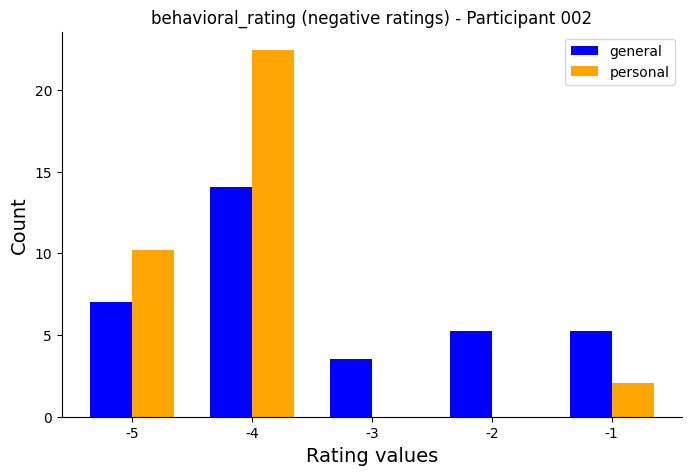

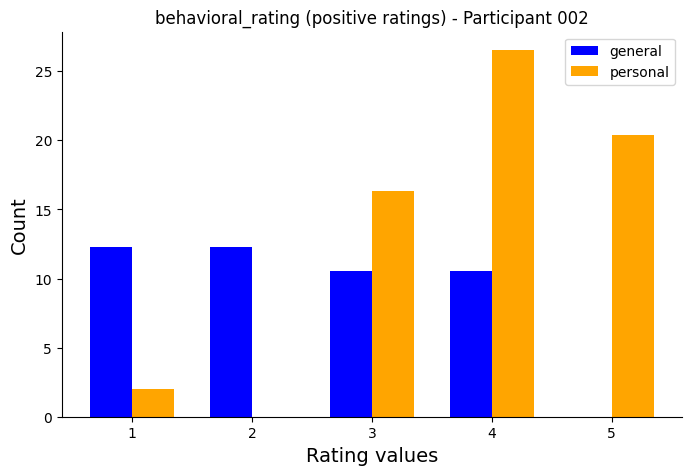

003


C:\ProgramData\miniconda3\envs\prompts\Lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\ProgramData\miniconda3\envs\prompts\Lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


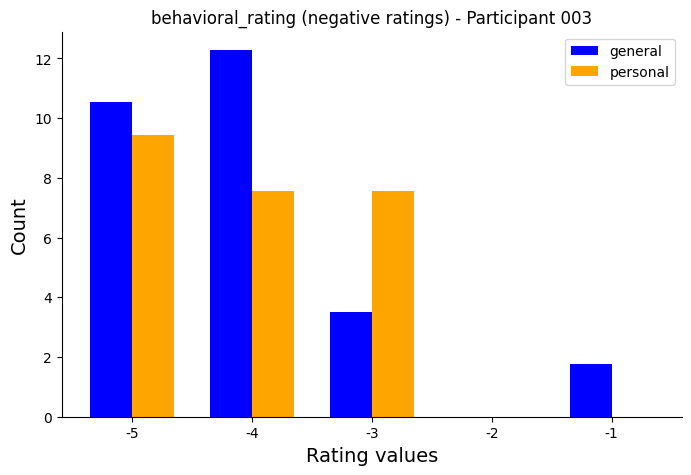

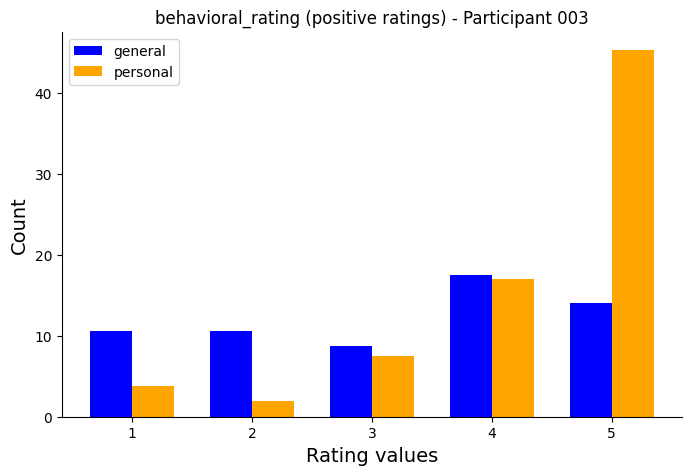

004


C:\ProgramData\miniconda3\envs\prompts\Lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\ProgramData\miniconda3\envs\prompts\Lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


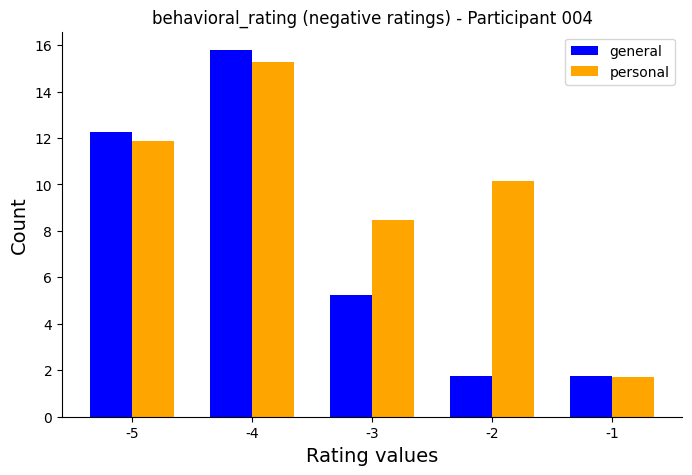

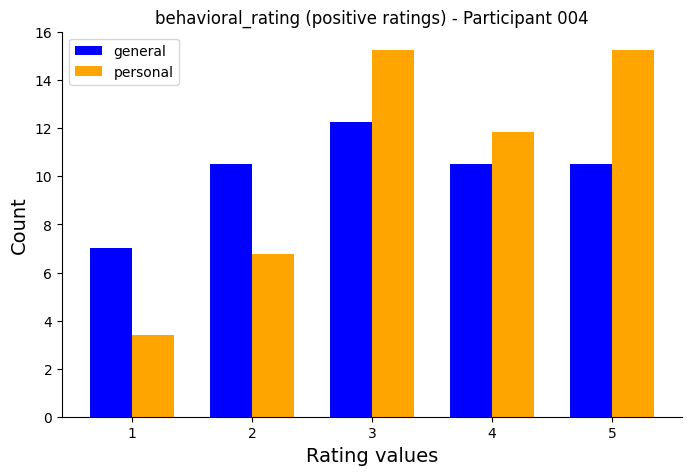

005


Stream 2: Calculated effective sampling rate 0.0000 Hz is different from specified rate 500.0000 Hz.
C:\ProgramData\miniconda3\envs\prompts\Lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\ProgramData\miniconda3\envs\prompts\Lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


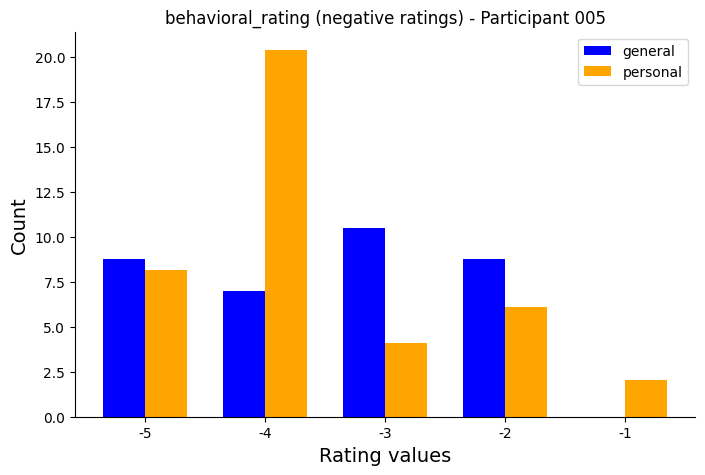

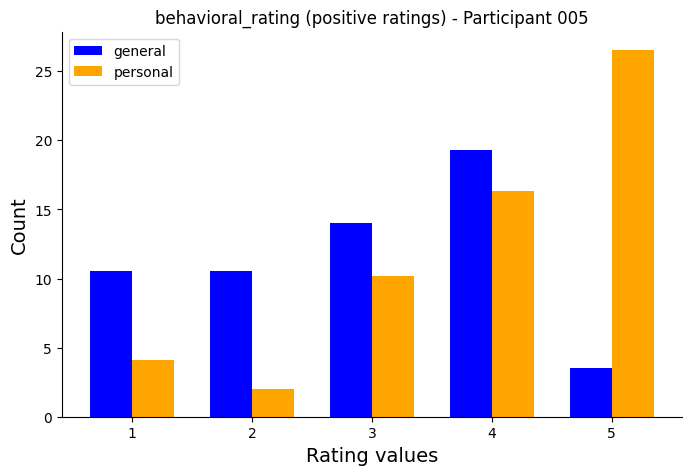

006


C:\ProgramData\miniconda3\envs\prompts\Lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\ProgramData\miniconda3\envs\prompts\Lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


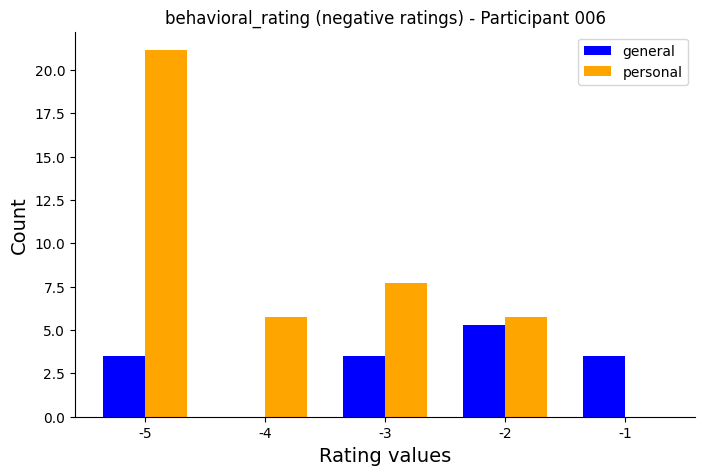

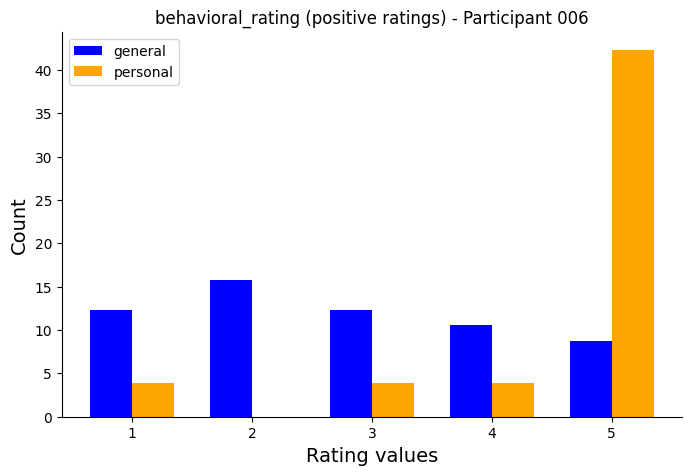

007


C:\ProgramData\miniconda3\envs\prompts\Lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\ProgramData\miniconda3\envs\prompts\Lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


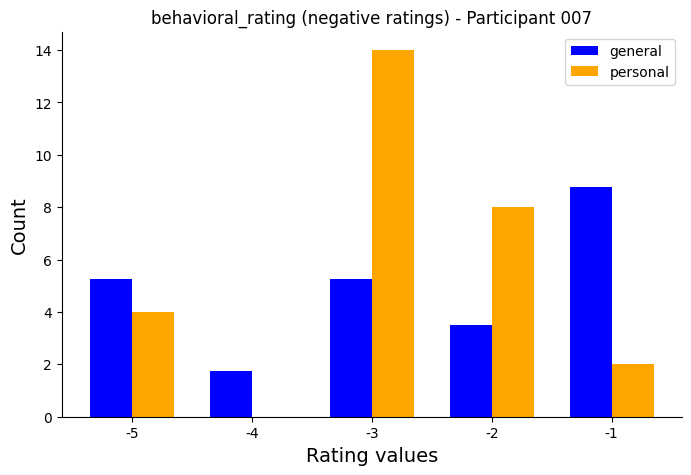

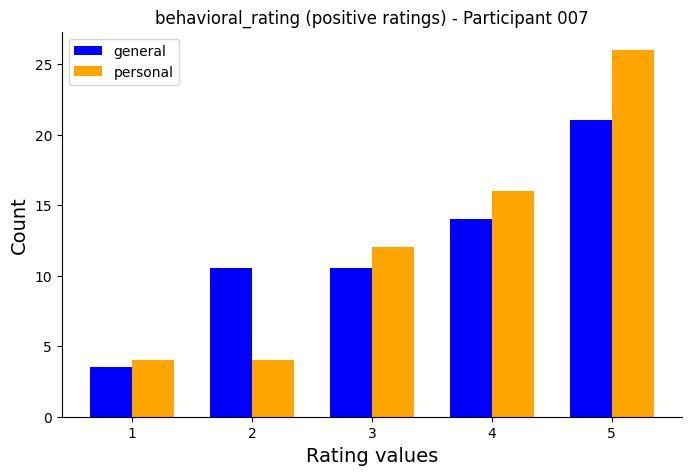

008


C:\ProgramData\miniconda3\envs\prompts\Lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\ProgramData\miniconda3\envs\prompts\Lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


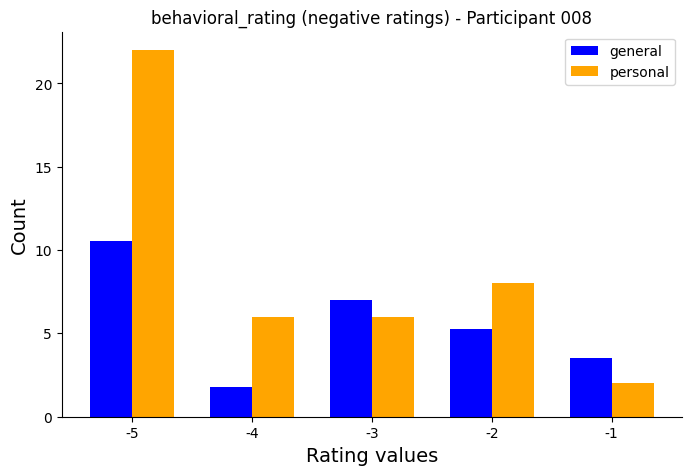

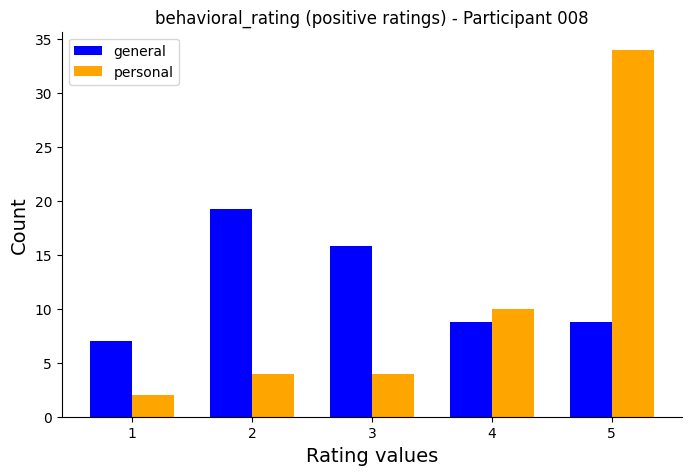

009


C:\ProgramData\miniconda3\envs\prompts\Lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\ProgramData\miniconda3\envs\prompts\Lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


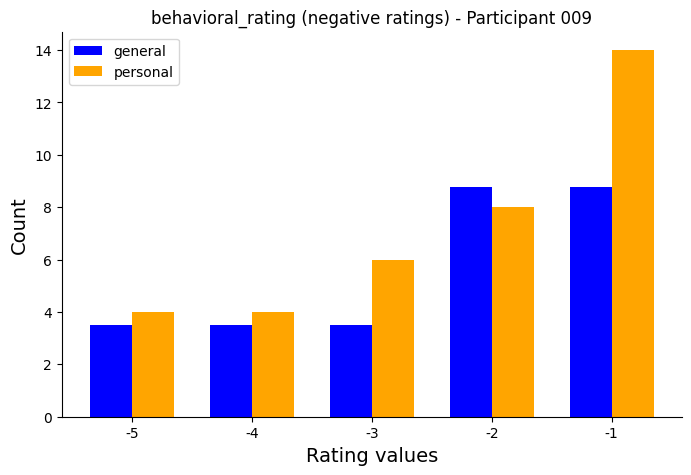

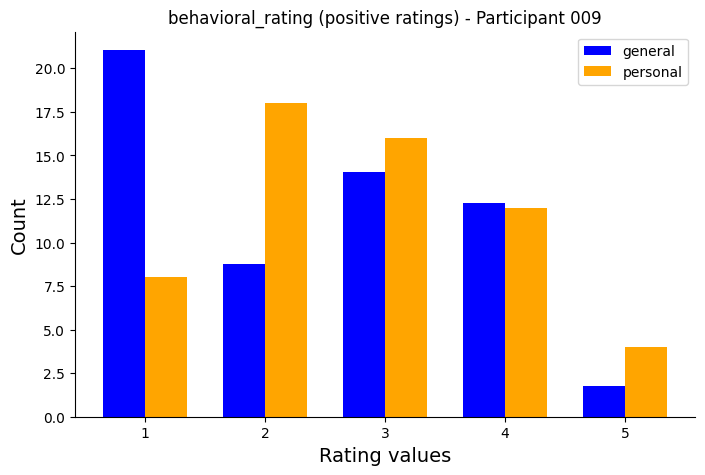

010


C:\ProgramData\miniconda3\envs\prompts\Lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\ProgramData\miniconda3\envs\prompts\Lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


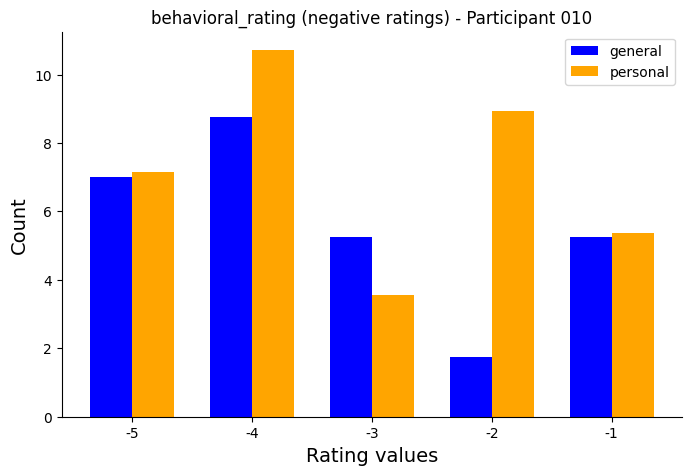

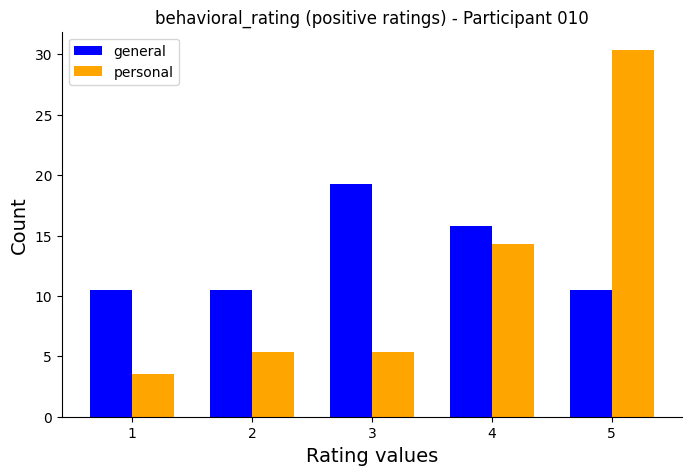

011


C:\ProgramData\miniconda3\envs\prompts\Lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\ProgramData\miniconda3\envs\prompts\Lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


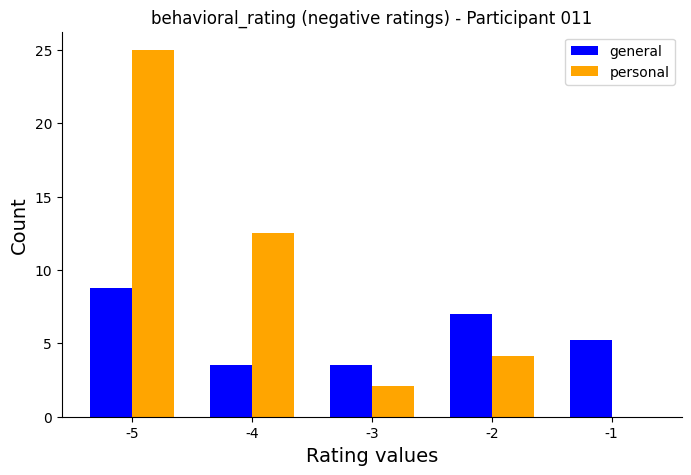

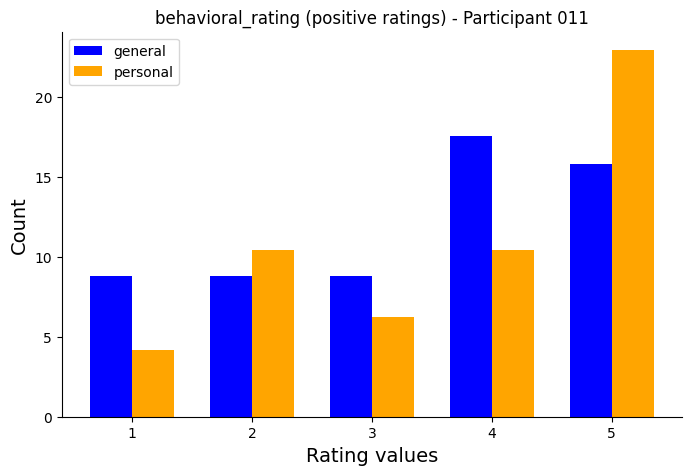

In [28]:
for p in participant_files:
    #get participant number
    figure_title = 'behavioral_rating'
    participant = p.split('-')[1].split('_')[0]
    print(participant)
    possible_ratings = np.arange(-5,6)
    personal_counts, general_counts = get_data(p, possible_ratings, percentage=True)
    create_split_figure(personal_counts, general_counts, possible_ratings, participant, figure_title, save=False)

In [20]:
'''
individual behavioral results for each participant auto
'''
for p in participant_files:
    #get participant number
    figure_title = 'behavioral_rating'
    participant = p.split('-')[1].split('_')[0]
    print(participant)
    possible_ratings = np.arange(-5,6)
    personal_counts, general_counts = get_data(p, possible_ratings, percentage=False)
    create_figure(personal_counts, general_counts, possible_ratings, participant, figure_title, save=False)
    
        

002
[5, 11, 0, 0, 1, 0, 1, 0, 8, 13, 10] [4, 8, 2, 3, 3, 11, 7, 7, 6, 6, 0]
003
[5, 4, 4, 0, 0, 0, 2, 1, 4, 9, 24] [6, 7, 2, 0, 1, 6, 6, 6, 5, 10, 8]
004
[7, 9, 5, 6, 1, 0, 2, 4, 9, 7, 9] [7, 9, 3, 1, 1, 7, 4, 6, 7, 6, 6]
005


Stream 2: Calculated effective sampling rate 0.0000 Hz is different from specified rate 500.0000 Hz.


[4, 10, 2, 3, 1, 0, 2, 1, 5, 8, 13] [5, 4, 6, 5, 0, 4, 6, 6, 8, 11, 2]
006
[11, 3, 4, 3, 0, 3, 2, 0, 2, 2, 22] [2, 0, 2, 3, 2, 14, 7, 9, 7, 6, 5]
007
[2, 0, 7, 4, 1, 5, 2, 2, 6, 8, 13] [3, 1, 3, 2, 5, 9, 2, 6, 6, 8, 12]
008
[11, 3, 3, 4, 1, 1, 1, 2, 2, 5, 17] [6, 1, 4, 3, 2, 7, 4, 11, 9, 5, 5]
009
[2, 2, 3, 4, 7, 3, 4, 9, 8, 6, 2] [2, 2, 2, 5, 5, 8, 12, 5, 8, 7, 1]
010
[4, 6, 2, 5, 3, 3, 2, 3, 3, 8, 17] [4, 5, 3, 1, 3, 3, 6, 6, 11, 9, 6]
011
[12, 6, 1, 2, 0, 1, 2, 5, 3, 5, 11] [5, 2, 2, 4, 3, 7, 5, 5, 5, 10, 9]


Stream 2: Calculated effective sampling rate 0.0000 Hz is different from specified rate 500.0000 Hz.


Rating		T-stat		P-value
-5		1.6259		0.1384		False
-4		1.8000		0.1054		False
-3		0.2641		0.7976		False
-2		0.4804		0.6424		False
-1		-1.7321		0.1173		False
+0		-5.8095		0.0003		True
+1		-5.6488		0.0003		True
+2		-3.1405		0.0119		True
+3		-1.9757		0.0796		False
+4		-0.6705		0.5194		False
+5		4.3192		0.0019		True
11


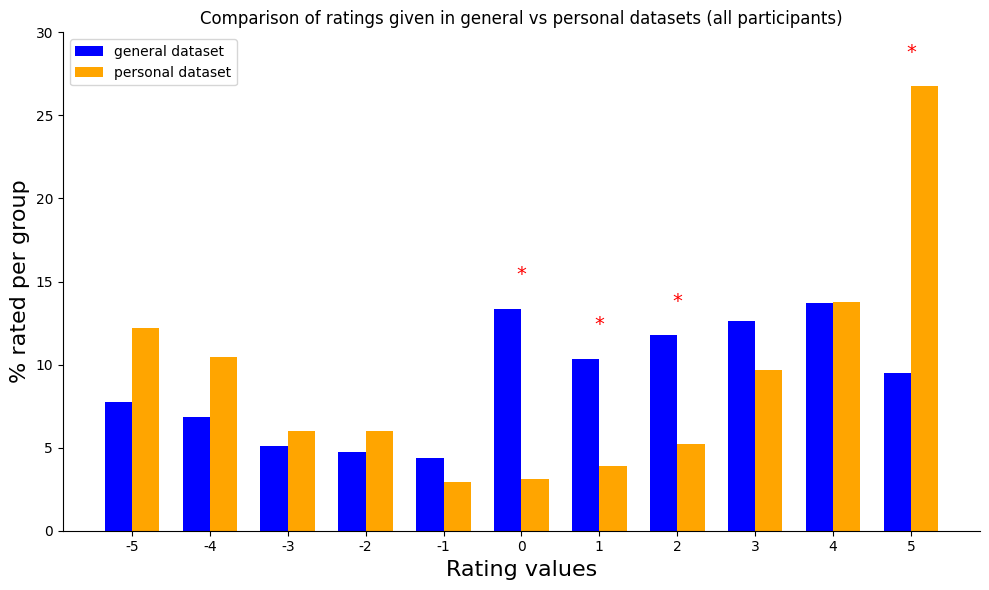

In [19]:
''' 
all ratings pooled
ratings as percentage
including ttest (* for significance)
''' 
personal_pool, general_pool = [],[]
general_total_image_count, personal_total_image_count = 0, 0

for p in participant_files:
    figure_title = 'behavioral_results_pooled' 
    possible_ratings = np.arange(-5,6)
    personal, general = get_data_pooled(p)
    general_total_image_count += len(general)
    personal_total_image_count += len(personal) 

    personal_ratings_counted = [personal.count(r) for r in possible_ratings]
    general_ratings_counted = [general.count(r) for r in possible_ratings]

    general_pool.append(general_ratings_counted)
    personal_pool.append(personal_ratings_counted)
    

general_transpose = np.transpose(np.array(general_pool))
personal_transpose = np.transpose(np.array(personal_pool))

print("Rating\t\tT-stat\t\tP-value")
significance = []
for i in range(len(general_pool) + 1):

    t_stat, p_val = ttest_rel(personal_transpose[i], general_transpose[i])
    significance.append(p_val < 0.05)
    print(f"{i - 5:+}\t\t{t_stat:.4f}\t\t{p_val:.4f}\t\t{p_val < 0.05}")

#find total number of ratings
total_personal, total_general = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for x, p in enumerate(personal_pool):
    for i, rating in enumerate(p):
        total_personal[i] = total_personal[i] + rating
        total_general[i] = total_general[i] + general_pool[x][i]

#calculate percentages
personal_percentage = [(x/personal_total_image_count)*100 for x in total_personal]
general_percentage  =[(x/general_total_image_count)*100 for x in total_general]

print(len(personal_percentage))
#find position of significant bars
significant_bars = [i for i, x in enumerate(significance) if x]
#[5, 6, 7, 8, 10]


y, h = max(personal_percentage) + 0.1, 0.1  
asterisk = '*'          

#create graph
index = (np.arange(len(possible_ratings)))

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(possible_ratings))

bar1 = ax.bar(index - bar_width/2, general_percentage, bar_width, label='general dataset', color='blue')
bar2 = ax.bar(index + bar_width/2, personal_percentage, bar_width, label='personal dataset', color='orange')

# add * for significance
for i in significant_bars:
    x_pos = index[i]
    max_height = max(personal_percentage[i], general_percentage[i])
    ax.text(x_pos, max_height + 1.5, '*', ha='center', va='bottom', fontsize=14, color='red')

ax.set_xlabel('Rating values', fontsize=16)
ax.set_ylabel('% rated per group', fontsize=16)
ax.set_title(f'Comparison of ratings given in general vs personal datasets (all participants)')
ax.set_xticks(index)
ax.set_xticklabels(possible_ratings)
ax.set_ylim(0, 30)
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig(f'figures_2/pooled_ratings.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()